# Теория вероятностей
## Практическое задание


**Правила:**

* Дедлайн **30 апреля 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `N.ipynb` и `N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 - 5 баллов
* Задача 2 - 20 баллов
* Задача 3 - 10 баллов
* Задача 4 - 10 баллов

Весь код в авторском решении задания выполняется за полминуты.

In [56]:
import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline

# Задача 1

**Задача 1.** В этой задаче вам нужно исследовать свойства плотности.

Для перечисленных ниже распределений нужно
1). На основе графиков плотности для различных параметров пояснить, за что отвечает каждый параметр.
2). Сгенерировать набор независимых случайных величин из этого распределения и построить по ним гистограмму.

Распределения:
* Нормальное (для этого распределения ниже дается большая часть кода, решение также было разобрано на презентации)
* Равномерное
* Экспоненциальное
* Гамма-распределение
* Бета-распределение

Функция, рисующая график плотности с заданными параметрами

In [57]:
def show_pdf(pdf, xmin, xmax, ymax, grid_size=100, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    pdf -- плотность
    xmin, xmax -- границы графика по оси x
    ymax -- граница графика по оси y
    grid_size -- размер сетки, по которой рисуется график
    kwargs -- параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)
    
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=3)
    plt.grid(ls=':')
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    plt.show()

Пример работы функции для нормального распределения $\mathcal{N}(0, 0.85^2)$

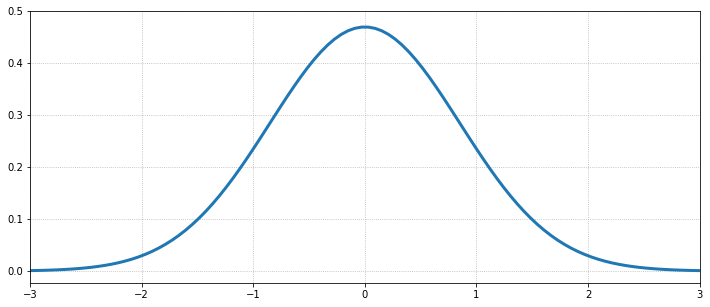

In [58]:
show_pdf(sps.norm.pdf, -3, 3, 0.5, scale=0.85)

Ответ на задачу проще дать с помощью виджетов. Ниже приведен пример создания виджета для нормального распределения. О том, что такое виджеты и как заставить их работать, см. в инструкциях к библиотеках на странице курса.

## Нормальное распределение

In [59]:
# создать виджет, но не отображать его
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.norm.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

HBox(children=(FloatSlider(value=-5.0, description='xmin', max=0.0, min=-10.0), FloatSlider(value=5.0, description='xmax', max=10.0)))

HBox(children=(FloatSlider(value=1.0, description='ymax', max=2.0), IntSlider(value=100, description='grid_size', max=300, min=25, step=25)))

HBox(children=(FloatSlider(value=0.0, description='loc', max=10.0, min=-10.0), FloatSlider(value=1.0, description='scale', max=2.0, min=0.01, step=0.01)))

Output()

Виджет в pdf передать не получится, поэтому нарисуйте еще несколько плотностей на одном графике, как это сделано ниже для нормального распределения.

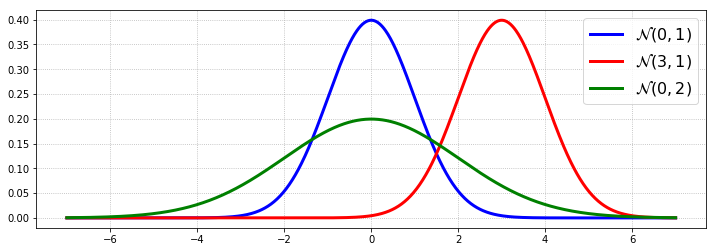

In [60]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [0, 3, 0]  # набор значений параметра a
sigma_list = [1, 1, 2]  # набор значений параметра sigma

plt.figure(figsize=(12, 4))
for i, (a, sigma, color) in enumerate(zip(a_list, sigma_list, ['b', 'r', 'g'])):
    plt.plot(grid, sps.norm(a, sigma).pdf(grid), color=color, lw=3, 
             label='$\mathcal{N}' + '({}, {})$'.format(a, sigma))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:**
Для нормального распределения:
* параметр $a$ отвечает за смещение грфика плотности по оси x. Совпадает с осью его симметрии;
* параметр $\sigma$ отвечает за "вытянутость" этого графика. Чем $\sigma$ меньше, тем плотность больше у оси симметрии.

## Раномерное распределение

In [61]:
# создать виджет, но не отображать его
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.uniform.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=300),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-4),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=4, step=0.1, value=2),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

HBox(children=(FloatSlider(value=-4.0, description='xmin', max=0.0, min=-10.0), FloatSlider(value=5.0, description='xmax', max=10.0)))

HBox(children=(FloatSlider(value=2.0, description='ymax', max=4.0), IntSlider(value=300, description='grid_size', max=300, min=25, step=25)))

HBox(children=(FloatSlider(value=0.0, description='loc', max=10.0, min=-10.0), FloatSlider(value=1.0, description='scale', max=2.0, min=0.01, step=0.01)))

Output()

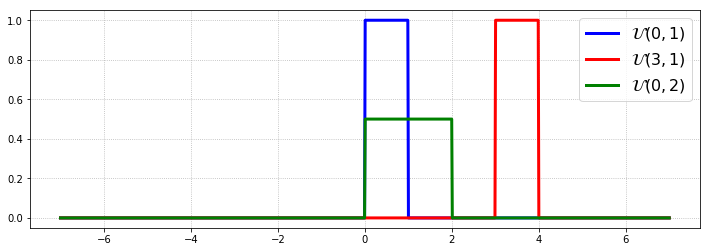

In [62]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [0, 3, 0]  # loc
interval_list = [1, 1, 2]  # scale

plt.figure(figsize=(12, 4))
for i, (a, interval, color) in enumerate(zip(a_list, interval_list, ['b', 'r', 'g'])):
    plt.plot(grid, sps.uniform(a, interval).pdf(grid), color=color, lw=3, 
             label='$\mathcal{U}' + '({}, {})$'.format(a, interval))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:**
Для равномерного распределения:
* параметр $a$ отвечает за левую границу графика, где плотность не 0;
* параметр $interval$ отвечает за длину промежутка, где плотность не 0 и значение плотности на нем. Зависимость обратная: $p=\frac{1}{interval}$.

## Экспоненциальное распределение

In [63]:
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.expon.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=300),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=10, step=1, value=1),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.02, max=5, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

HBox(children=(FloatSlider(value=-5.0, description='xmin', max=0.0, min=-10.0), FloatSlider(value=5.0, description='xmax', max=10.0)))

HBox(children=(FloatSlider(value=1.0, description='ymax', max=10.0, step=1.0), IntSlider(value=300, description='grid_size', max=300, min=25, step=25)))

HBox(children=(FloatSlider(value=0.0, description='loc', max=10.0, min=-10.0), FloatSlider(value=1.0, description='scale', max=5.0, min=0.02, step=0.01)))

Output()

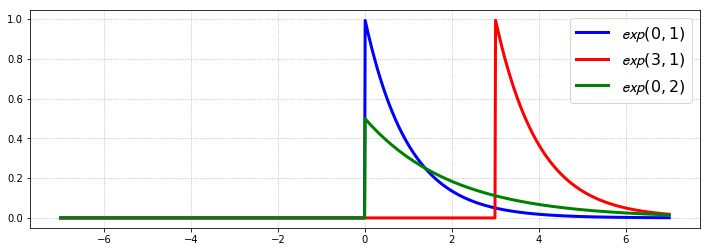

In [64]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [0, 3, 0]  # набор значений параметра left_boundary
lambda_list = [1, 1, 2]  # набор значений параметра lamblda 
plt.figure(figsize=(12, 4))
for i, (a, lambda_, color) in enumerate(zip(a_list, lambda_list, ['b', 'r', 'g'])):
    plt.plot(grid, sps.expon(a, lambda_).pdf(grid), color=color, lw=3, 
             label='$\mathcal{exp}' + '({}, {})$'.format(a, lambda_))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:**
Для экспненциального распределения:
* параметр $a$ отвечает за левую границу графика, где плотность не 0;
* параметр $\lambda$ отвечает то, насколько плотность более сконцентрирована у левой границы и какое максимально хначение достигается. Зависимость максимума обратная: $p_{max}=\frac{1}{\lambda}$.

## Гамма-распределение

In [65]:
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.gamma.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=300),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=50, step=1, value=1),
                         a=widgets.FloatSlider(min=0, max=5, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.02, max=5, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
display(widgets.HBox(ip.children[6:7]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

HBox(children=(FloatSlider(value=-5.0, description='xmin', max=0.0, min=-10.0), FloatSlider(value=5.0, description='xmax', max=10.0)))

HBox(children=(FloatSlider(value=1.0, description='ymax', max=50.0, step=1.0), IntSlider(value=300, description='grid_size', max=300, min=25, step=25)))

HBox(children=(FloatSlider(value=1.0, description='a', max=5.0), FloatSlider(value=0.0, description='loc', max=10.0, min=-10.0)))

HBox(children=(FloatSlider(value=1.0, description='scale', max=5.0, min=0.02, step=0.01),))

Output()

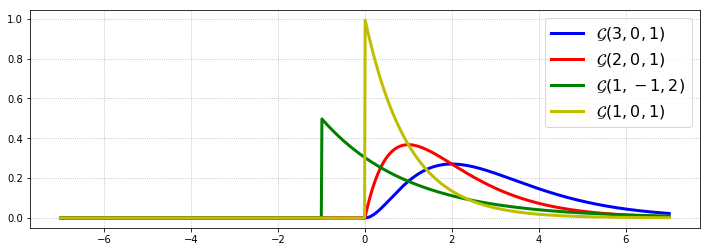

In [66]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [3, 2, 1, 1]  # набор значений параметра a
loc_list = [0, 0,-1, 0]   # набор значений параметра loc
scale_list = [1, 1, 2, 1]  # набор значений параметра scale

plt.figure(figsize=(12, 4))
for i, (a, loc, scale, color) in enumerate(zip(a_list, loc_list, scale_list, ['b', 'r', 'g', 'y'])):
    plt.plot(grid, sps.gamma(a, loc, scale).pdf(grid), color=color, lw=3, 
             label='$\mathcal{G}' + '({}, {}, {})$'.format(a, loc, scale))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:**
Для гамма-распределения:
* параметр $a$ влияет на характер распределения. Например, при a = 1 получаем экспоненциальное распределение
* параметр $lос$ отвечает за левую границу графика, где плотность не 0;
* параметр $scale$ отвечает за масштаб графика по оси y;

## Бета-распределение

In [67]:
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.beta.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=300),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=10, step=1, value=2),
                         a=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1),
                         b=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.02, max=5, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
display(widgets.HBox(ip.children[6:8]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

HBox(children=(FloatSlider(value=-5.0, description='xmin', max=0.0, min=-10.0), FloatSlider(value=5.0, description='xmax', max=10.0)))

HBox(children=(FloatSlider(value=2.0, description='ymax', max=10.0, step=1.0), IntSlider(value=300, description='grid_size', max=300, min=25, step=25)))

HBox(children=(FloatSlider(value=1.0, description='a', max=5.0, min=0.1), FloatSlider(value=1.0, description='b', max=5.0, min=0.1)))

HBox(children=(FloatSlider(value=0.0, description='loc', max=10.0, min=-10.0), FloatSlider(value=1.0, description='scale', max=5.0, min=0.02, step=0.01)))

Output()

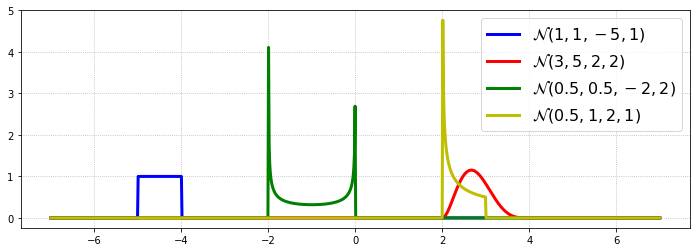

In [68]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [1, 3, 0.5, 0.5]  # набор значений параметра a
b_list = [1, 5, 0.5, 1]  # набор значений параметра b
loc_list = [-5, 2 ,-2, 2]   # набор значений параметра loc
scale_list = [1, 2, 2, 1]  # набор значений параметра scale

plt.figure(figsize=(12, 4))
for i, (a, b, loc, scale, color) in enumerate(zip(a_list, b_list, loc_list, scale_list, ['b', 'r', 'g', 'y'])):
    plt.plot(grid, sps.beta(a, b, loc, scale).pdf(grid), color=color, lw=3, 
             label='$\mathcal{N}' + '({}, {}, {}, {})$'.format(a, b, loc, scale))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:**
Для бета-распределения:
* параметры $a$ и $b$ влияют на характер распределения. Например, при $a=b=1$ получаем равномерное распределение.
* параметр $lос$ отвечает за левую границу графика, где плотность не 0;
* параметр $scale$ отвечает за масштаб графика по оси y;

# Задача 3

В следующих задачах для генерации случайных величин можно использовать библиотеку `scipy.stats`.

**Задача 3.** В этой задаче нужно визуализировать *закон больших чисел*.

*a).* Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $\mathcal{N}(a, \sigma^2)$. Согласно закону больших чисел выполнена сходимость $\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\to} a$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов среднее в зависимости от размера набора.

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждому из них посчитайте среднее $X_{jn} = \frac{1}{n}\sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть среднее по первым $n$ величинам $j$-го набора. При написании кода может помочь функция `numpy.cumsum(axis=...)`.

Для каждого $j$ нанесите на один график зависимость $X_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Поскольку при малых $n$ значения средних могут быть большими по модулю, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Выполните те же действия для распределений $Exp(1)$ и $Pois(1)$.

Сделайте вывод о смысле закона больших чисел. Подтверждают ли сделанные эксперименты теоретические свойства?

## Нормальное распределение

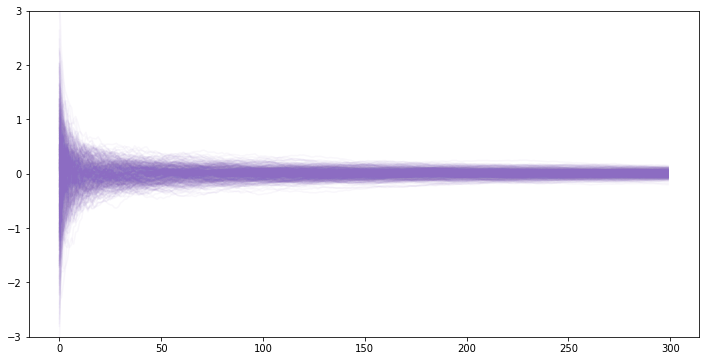

In [69]:
sample = np.array(sps.norm.rvs(size = (500, 300), loc = 0, scale = 1))
X_jn = sample.cumsum(axis = 1)/np.arange(1,301)
plt.figure(figsize=(12, 6))
plt.ylim((-3, 3))
plt.plot(X_jn.T, alpha = 0.05, color = '#8c6cc2')
plt.show()

## Экспоненциальное распределение

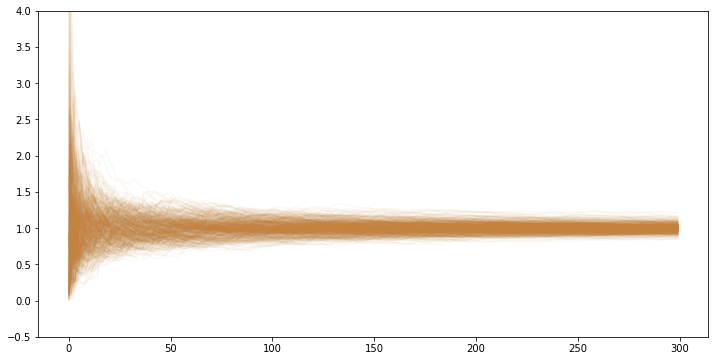

In [70]:
sample = np.array(sps.expon.rvs(size = (500, 300)))
X_jn = sample.cumsum(axis = 1)/np.arange(1,301)
plt.figure(figsize=(12, 6))
plt.ylim((-0.5, 4))
plt.plot(X_jn.T, alpha = 0.05, color = '#c4833d')
plt.show()

## Пуассоновское распределение

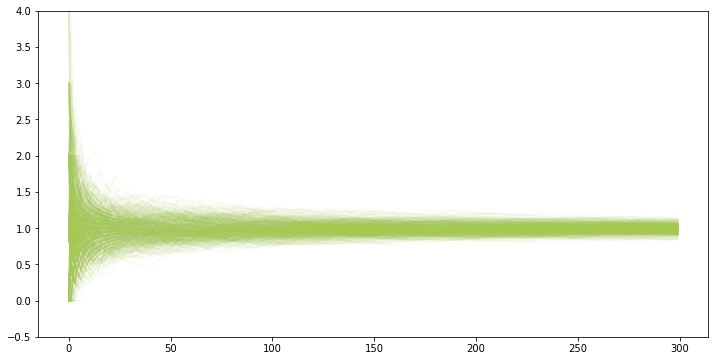

In [71]:
sample = np.array(sps.poisson.rvs(size = (500, 300), mu = 1))
X_jn = sample.cumsum(axis = 1)/np.arange(1,301)
plt.figure(figsize=(12, 6))
plt.ylim((-0.5, 4))
plt.plot(X_jn.T, alpha = 0.05, color = '#a5c950')
plt.show()

**Вывод:** По результатам эксперимента видим, что среднее значение случайной величины при достаточно большой выборке стремится к её матожиданию (для нормального 0, для экспоненциального и пуассоновского 1)

Это же утверждает закон больших чисел: среднее значение конечной выборки из фиксированного распределения близко к математическому ожиданию этого распределения.
Таким образом, эксперимент подтвердил верность этого закона

# Задача 4

**Задача 4.** В этой задаче нужно визуализировать *центральную предельную теорему*.

*a).* Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$, где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

*b).* Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

## Экспоненциальное распределение

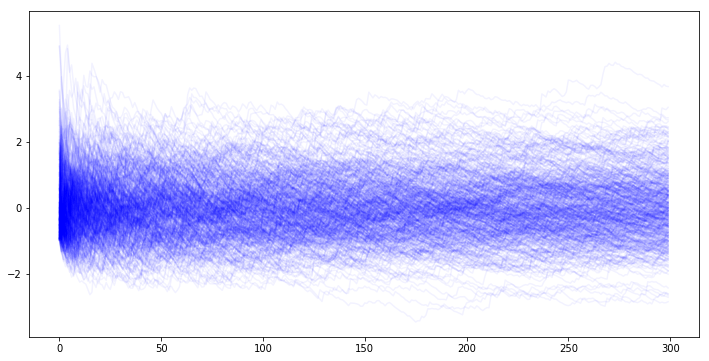

In [72]:
sample = np.array(sps.expon.rvs(size = (500, 300)))
X = sample.cumsum(axis = 1)
Z = (X - sps.expon.mean() * np.arange(1,301)) / np.sqrt(sps.expon.var() * np.arange(1,301))
plt.figure(figsize=(12, 6))
plt.plot(Z.T, alpha = 0.05, color = 'blue')
plt.show()

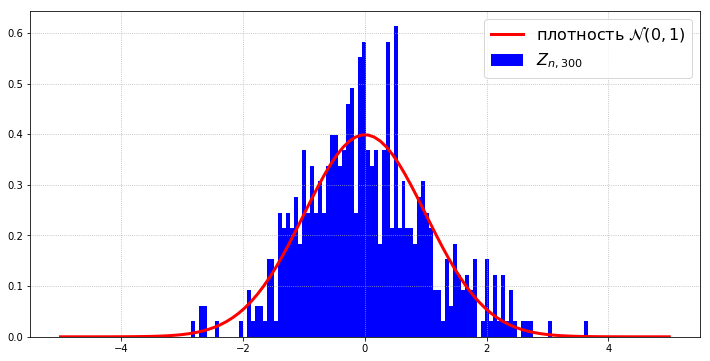

In [73]:
plt.figure(figsize=(12, 6))
sample = Z[:, 299]
plt.hist(sample, bins=100, normed=True, color='blue', label='$Z_{n,300}$')
grid = np.linspace(-5, 5, 100)
plt.plot(grid, sps.norm.pdf(grid), color='red', lw=3, label='плотность $\mathcal{N}(0, 1)$')
plt.legend(fontsize = 16)
plt.grid(ls=':')
plt.show()

**Вывод:** 

Для экспоненциального распределения $Z_{jn}$ не сходится

По графику видно, что гистограмма случайных величин $Z_{1,300}, ..., Z_{500,300}$ с достаточной точностью повторяет график плотности $\mathcal{N}(0, 1)$

## Равномерное распределение

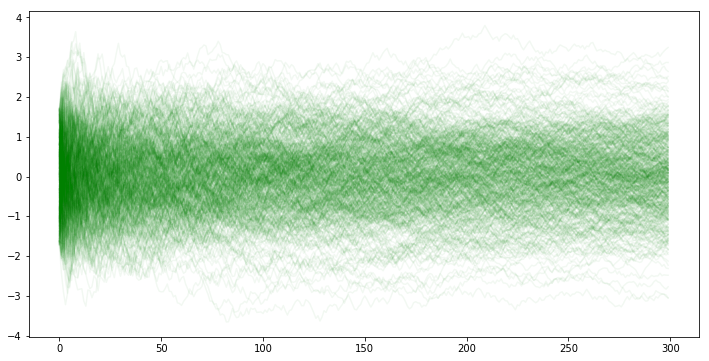

In [74]:
sample = np.array(sps.uniform.rvs(size = (500, 300)))
X = sample.cumsum(axis = 1)
Z = (X - sps.uniform.mean() * np.arange(1,301)) / np.sqrt(sps.uniform.var() * np.arange(1,301))
plt.figure(figsize=(12, 6))
plt.plot(Z.T, alpha = 0.05, color = 'green')
plt.show()

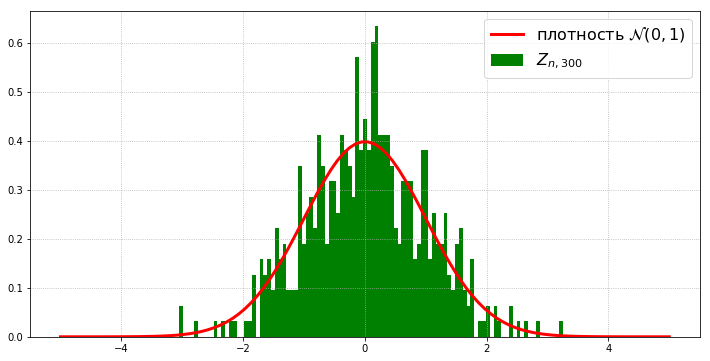

In [75]:
plt.figure(figsize=(12, 6))
sample = Z[:, 299]
plt.hist(sample, bins=100, normed=True, color='green', label='$Z_{n,300}$')
grid = np.linspace(-5, 5, 100)
plt.plot(grid, sps.norm.pdf(grid), color='red', lw=3, label='плотность $\mathcal{N}(0, 1)$')
plt.legend(fontsize = 16)
plt.grid(ls=':')
plt.show()

**Вывод:** 

Для равномерного распределения $Z_{jn}$ так же не сходится

По графику видно, что гистограмма случайных величин $Z_{1,300}, ..., Z_{500,300}$ с достаточной точностью повторяет график плотности $\mathcal{N}(0, 1)$

## Пуассоновское распределение

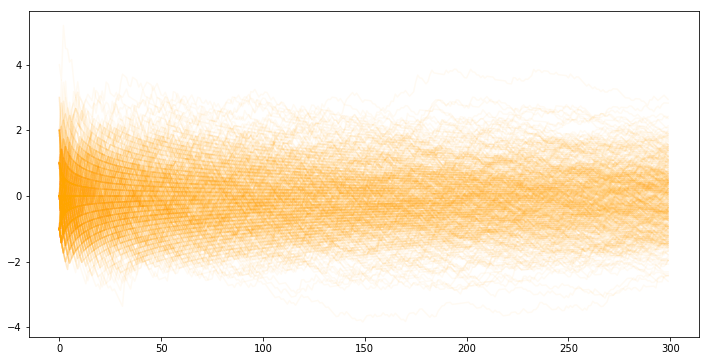

In [80]:
sample = np.array(sps.poisson.rvs(mu = 1, size = (500, 300)))
X = sample.cumsum(axis = 1)
Z = (X - sps.poisson(mu = 1).mean() * np.arange(1,301)) / np.sqrt(sps.poisson(mu = 1).var() * np.arange(1,301))
plt.figure(figsize=(12, 6))
plt.plot(Z.T, alpha = 0.05, color = 'orange')
plt.show()

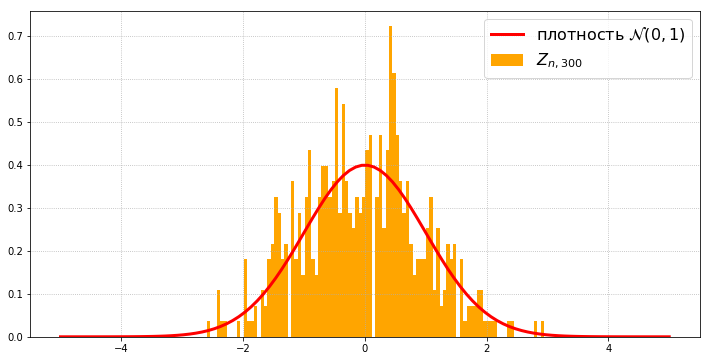

In [81]:
plt.figure(figsize=(12, 6))
sample = Z[:, 299]
plt.hist(sample, bins=100, normed=True, color='orange', label='$Z_{n,300}$')
grid = np.linspace(-5, 5, 100)
plt.plot(grid, sps.norm.pdf(grid), color='red', lw=3, label='плотность $\mathcal{N}(0, 1)$')
plt.legend(fontsize = 16)
plt.grid(ls=':')
plt.show()

**Вывод:** 

Для пуассоновского распределения $Z_{jn}$ снова не сходится

И по графику видно, что гистограмма случайных величин $Z_{1,300}, ..., Z_{500,300}$ с достаточной точностью повторяет график плотности $\mathcal{N}(0, 1)$

**Общий вывод:**

Пусть дан набор случайных величин. И случайная величина $X$ является их суммой. Тогда мы можем говорить о некоторых свойствах $X$, даже не зная распределение исходных выличин.

Например, мы можем утверждать, что $X$ распределена как $\mathcal N(nE,nD)$:

$$\mathcal N(nE, nD) = nE + \sqrt{n}D\mathcal N(0,1)$$
подставив в формулу $Z_n$, получим сходимость:
$$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$$


Отсутствие сходимости $Z_{jn}$ обусловлено тем, что в теореме говорится про поточечную сходимость, про глобальную ничего не утверждается